In [10]:

import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [11]:
SUBSET_NAME = "multilingual_mi2"

df_mis = pd.read_csv('../../output/multilingual/mis2.csv')
df_rouge = pd.read_csv('../../output/multilingual/common.csv')
df_classifiers = pd.read_csv('../../output/multilingual/classifiers.csv')
model_sizes = pd.read_csv('../../output/model_sizes.csv')

df_bert = pd.read_csv('../../output/multilingual/bert.csv')
df_emb = pd.read_csv('../../output/multilingual/emb.csv')
df_shm = pd.read_csv('../../output/multilingual/shm.csv')


df_rouge['source'] = df_rouge["Unnamed: 0"]
df_classifiers['source'] = df_classifiers["Unnamed: 0"]
df_mis['source'] = df_mis["filename"]
df_bert['source'] = df_bert["Unnamed: 0"]
df_emb['source'] = df_emb["Unnamed: 0"]
df_shm['source'] = df_shm["Unnamed: 0"]


# merge all dataframes on source
df_comprehensive = df_mis.merge(df_rouge, on='source', how="outer")
df_comprehensive = df_comprehensive.merge(df_classifiers, on='source')
# merge emb and bert
df_comprehensive = df_comprehensive.merge(df_bert, on='source')
df_comprehensive = df_comprehensive.merge(df_emb, on='source')
df_comprehensive = df_comprehensive.merge(df_shm, on='source')



df_comprehensive['metadata/Model name'] = df_comprehensive['source'].apply(lambda x: x.split('-_-')[0])
df_comprehensive['metadata/Decoding config'] = df_comprehensive['source'].apply(lambda x: x.split('-_-')[2])
df_comprehensive['metadata/Dataset name'] = df_comprehensive['source'].apply(lambda x: x.split('-_-')[1])


# remove all columns with gold
df_comprehensive = df_comprehensive[[c for c in df_comprehensive.columns if "gold" not in c]]




# df_comprehensive = df_comprehensive.merge(model_sizes, on='metadata/Model name')

# replace first _ in model by /
df_comprehensive['metadata/Model name'] = df_comprehensive['metadata/Model name'].apply(
    lambda x: x.replace('_', '/', 1))

# drop columns with _x or _y
df_comprehensive = df_comprehensive[[c for c in df_comprehensive.columns if not c.endswith("_x") and not c.endswith("_y")]]




print(df_comprehensive['metadata/Dataset name'].unique())

datasets = ['xlsum_fra', 'xlsum_spa', 'mlsum_fra', 'mlsum_spa']
df_comprehensive = df_comprehensive[df_comprehensive['metadata/Dataset name'].isin(datasets)]

to_drop=[c for c in df_comprehensive.columns if "large-openai" in c]
df_comprehensive = df_comprehensive.drop(to_drop, axis=1)



['orange_fra' 'mlsum_deu' 'xlsum_spa' 'xlsum_fra' 'mlsum_spa' 'mlsum_fra']


/tmp/ipykernel_135386/3483988823.py:26: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_comprehensive = df_comprehensive.merge(df_emb, on='source')


In [12]:
df_comprehensive

,filename,metadata/Embedding model,metadata/Decoding config,metadata/Date,metadata/Model name,metadata/Dataset name,I(text -> summary),H(summary),H(summary|text),I(summary -> text),...,SHMetric/Grammar/guess,SHMetric/Attribution/proba_1,SHMetric/Attribution/proba_0,SHMetric/Attribution/guess,SHMetric/Main ideas/proba_1,SHMetric/Main ideas/proba_0,SHMetric/Main ideas/guess,SHMetric/Conciseness/proba_1,SHMetric/Conciseness/proba_0,SHMetric/Conciseness/guess
2,eslamxm_mt5-base-finetuned-Spanish-_-xlsum_spa...,sentence-transformers/all-distilroberta-v1,beam_sampling_200,2024-01-27-00-05-08,eslamxm/mt5-base-finetuned-Spanish,xlsum_spa,2.023786,-58.146199,-60.169985,2.848020,...,0.2584,0.400188,0.599798,0.2851,0.113693,0.886306,0.0456,0.122635,0.877366,0.0065
4,moussaKam_barthez-orangesum-abstract-_-xlsum_f...,sentence-transformers/all-distilroberta-v1,beam_sampling_100,2024-01-26-20-59-33,moussaKam/barthez-orangesum-abstract,xlsum_fra,2.341613,-58.157651,-60.499264,2.840437,...,0.9787,0.625137,0.374860,0.6950,0.360095,0.639906,0.3463,0.428233,0.571757,0.4201
5,josmunpen_mt5-small-spanish-summarization-_-ml...,sentence-transformers/all-distilroberta-v1,beam_sampling_100,2024-01-26-22-48-46,josmunpen/mt5-small-spanish-summarization,mlsum_spa,2.290577,-58.159381,-60.449959,2.915044,...,0.3879,0.654062,0.345933,0.7333,0.188725,0.811276,0.1517,0.298200,0.701792,0.2389
6,csebuetnlp_mT5_multilingual_XLSum-_-xlsum_fra-...,sentence-transformers/all-distilroberta-v1,beam_sampling_200,2024-01-26-21-25-41,csebuetnlp/mT5_multilingual_XLSum,xlsum_fra,2.378747,-58.160128,-60.538875,2.787373,...,0.9711,0.472664,0.527329,0.4788,0.338123,0.661877,0.3346,0.373511,0.626483,0.3585
7,eslamxm_mt5-base-finetuned-Spanish-_-mlsum_spa...,sentence-transformers/all-distilroberta-v1,beam_sampling_100,2024-01-26-23-53-31,eslamxm/mt5-base-finetuned-Spanish,mlsum_spa,1.985280,-58.138240,-60.123520,2.985485,...,0.1511,0.379454,0.620534,0.2687,0.088144,0.911857,0.0354,0.110444,0.889556,0.0058
8,moussaKam_barthez-orangesum-abstract-_-mlsum_f...,sentence-transformers/all-distilroberta-v1,beam_sampling_100,2024-01-26-21-06-15,moussaKam/barthez-orangesum-abstract,mlsum_fra,2.202000,-58.150749,-60.352750,2.725748,...,0.9687,0.757307,0.242692,0.8740,0.358007,0.641995,0.3484,0.502488,0.497504,0.5744
9,plguillou_t5-base-fr-sum-cnndm-_-xlsum_fra-_-b...,sentence-transformers/all-distilroberta-v1,beam_sampling_200,2024-01-26-22-53-54,plguillou/t5-base-fr-sum-cnndm,xlsum_fra,2.249914,-58.063215,-60.313129,2.914293,...,0.9384,0.735928,0.264065,0.8611,0.490149,0.509854,0.4988,0.479453,0.520535,0.5095
10,josmunpen_mt5-small-spanish-summarization-_-xl...,sentence-transformers/all-distilroberta-v1,beam_sampling_100,2024-01-26-22-47-59,josmunpen/mt5-small-spanish-summarization,xlsum_spa,2.226242,-58.083951,-60.310193,2.829485,...,0.4953,0.647396,0.352597,0.7278,0.201283,0.798717,0.1459,0.298803,0.701189,0.2254
11,IIC_mt5-spanish-mlsum-_-mlsum_spa-_-beam_sampl...,sentence-transformers/all-distilroberta-v1,beam_sampling_50,2024-01-26-23-06-36,IIC/mt5-spanish-mlsum,mlsum_spa,2.471131,-58.152731,-60.623862,3.057939,...,0.5662,0.811200,0.188799,0.9436,0.395335,0.604663,0.4007,0.476729,0.523261,0.5140
12,IIC_mt5-spanish-mlsum-_-xlsum_spa-_-beam_sampl...,sentence-transformers/all-distilroberta-v1,beam_sampling_200,2024-01-26-23-30-03,IIC/mt5-spanish-mlsum,xlsum_spa,2.381069,-58.131721,-60.512790,2.978507,...,0.6654,0.803383,0.196613,0.9511,0.452432,0.547571,0.4712,0.483532,0.516456,0.5167


In [13]:

# sns.lmplot(data=df_comprehensive, x='metadata/#params', y='SHMetric/Main ideas/proba_1', col="metadata/Dataset name",
         #  hue="metadata/Model name", height=5, sharey=False)
         

In [14]:
df_comprehensive.columns

Index(['filename', 'metadata/Embedding model', 'metadata/Decoding config',
       'metadata/Date', 'metadata/Model name', 'metadata/Dataset name',
       'I(text -> summary)', 'H(summary)', 'H(summary|text)',
       'I(summary -> text)', 'H(text)', 'H(text|summary)', 'source',
       'common/rouge1', 'common/rouge2', 'common/rougeL', 'common/rougeLsum',
       'wesleyacheng_news-topic-classification-with-bert/l2',
       'wesleyacheng_news-topic-classification-with-bert/l1',
       'wesleyacheng_news-topic-classification-with-bert/dot',
       'wesleyacheng_news-topic-classification-with-bert/kl',
       'wesleyacheng_news-topic-classification-with-bert/proba_of_error',
       'SamLowe_roberta-base-go_emotions/l2',
       'SamLowe_roberta-base-go_emotions/l1',
       'SamLowe_roberta-base-go_emotions/dot',
       'SamLowe_roberta-base-go_emotions/kl',
       'SamLowe_roberta-base-go_emotions/proba_of_error',
       'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/l2',

In [15]:

SHMS = [c for c in df_comprehensive.columns if "SHMetric" in c and "proba_1" in c]

task_map = {'wesleyacheng_news-topic-classification-with-bert/proba_of_success' : "Topic", 'SamLowe_roberta-base-go_emotions/proba_of_success': "Emotions", 'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/proba_of_success' : "Sentiment Analysis", 'roberta-base-openai-detector/proba_of_success' : "GPT Detector", 'manifesto-project_manifestoberta-xlm-roberta-56policy-topics-context-2023-1-1/proba_of_success' : "Policy", 'embeddings/sentence-transformers_all-mpnet-base-v2/dot' : "MPNET", 'embeddings/sentence-transformers_all-MiniLM-L6-v2/dot' : "all-MiniLM", 'embeddings/sentence-transformers_paraphrase-MiniLM-L6-v2/dot' : "Paraphrase", 'common/rougeLsum' : "ROUGE-L", 'common/BERTScore' : "BERTScore"} | {c: c.split('/')[1] for c in SHMS}


def make_correlation_table(df):
    df = df.copy()
    
    # df = df[df['metadata/Decoding config'].str.contains("100") | df['metadata/Decoding config'].str.contains("50")]
    
    

    ROUGES = ["common/rougeLsum", "common/BERTScore"]
    MI = ['I(summary -> text)', 'I(text -> summary)']
    # SHM = [c for c in df.columns if "SHMetric" in c and "proba_1" in c]
    # SHM_interesting = [c for c in SHM if "Attribution" in c or "Main ideas" in c]

    SHM = [c for c in df.columns if "SHMetric" in c and "proba_1" in c]
    SHM_interesting = [c for c in SHM if "Attribution" in c or "Main ideas" in c]
   
    
    embeddings = [c for c in df.columns if "embedding" in c]

    # map_tasks = {"mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis": "Sentiment analysis",
    #              "roberta-base-openai-detector": "GPT detector",
    #              # "manifesto-project_manifestoberta-xlm-roberta-56policy-topics-context-2023-1-1" : "Policy classification",
    #              # "jonaskoenig_topic_classification_04" : "Topic classification",
    #              "SamLowe_roberta-base-go_emotions" : "Emotion classification",
    #              }
    
    map_tasks = {c: f"Classif-{k}" for k,c in enumerate(df.columns.unique()) if "proba_of_error" in c}
    
    print(map_tasks)

    embedding_map = {c : f"Emb-{k}" for k,c in enumerate(embeddings)}

    classification_tasks = [c for c in map_tasks.keys()]

    # make proba_of_error proba_of_success
    df[classification_tasks] = 1 - df[classification_tasks]
    # rename
    df = df.rename(columns={c: '/'.join(c.split('/')[:-1]) + "/proba_of_success" for c in map_tasks.keys()})

    classification_tasks = ['/'.join(c.split('/')[:-1]) + "/proba_of_success" for c in map_tasks.keys()]
    
    embedding_tasks = [c for c in df.columns if "embedding" in c and "dot" in c]

    datasets = set(df['metadata/Dataset name'].dropna().unique())

    # create a dataframe with the correlation between MI and ROUGE and the SHmetrics, grouped by dataset
    df_corr = pd.DataFrame(columns=['Dataset name', 'Metric', 'Correlation'])
    
    
    for dataset in datasets:
        # select dataset
        df_dataset = df[df['metadata/Dataset name'] == dataset]
        df_dataset = df_dataset[ROUGES + SHM + MI + classification_tasks + embedding_tasks].corr("kendall")
        # add dataset name
        df_dataset['Dataset name'] = dataset

        # add metric name
        df_dataset['Metric'] = df_dataset.index

        # melt dataframe
        df_dataset = df_dataset.melt(id_vars=['Dataset name', 'Metric'], var_name="Correlation", value_name="Value")

        # append to main dataframe
        df_corr = df_corr.append(df_dataset)
        

    def rename_metrics(x):
        splits = x.split('/')

        if len(splits) == 1:
            if splits[0] == "I(summary -> text)":
                return "$I(S;T)$"
            else:
                return x
        else:
            if x in task_map:
                return task_map[x]
            else:
                return x

    df_corr = df_corr.pivot(index=['Dataset name', 'Metric'], columns='Correlation', values='Value')
    

    # Keep shmetric only in columns
    df_corr = pd.concat(
        {'SH.': df_corr[[c for c in df_corr.columns if "SHMetric" in c]], 'CT.': df_corr[classification_tasks], 'Emb.' : df_corr[embedding_tasks], "Common" : df_corr[ROUGES]}, axis=1)

    idx = pd.IndexSlice
    # Select index to be displayed
    df_corr = df_corr.loc[idx[:, ['I(summary -> text)'] + ROUGES + SHM_interesting], :]
    # df_corr = df_corr.dropna()

    df_corr = df_corr.reset_index()
    # rename columns
    #df_corr.columns = pd.MultiIndex.from_tuples(
    #    [(c[0].replace('_', '-'), rename_metrics(c[0])) for c in df_corr.columns])

    
    # rename Metric
    df_corr[('Metric', '')] = df_corr[('Metric', '')].apply(rename_metrics)

    df_corr = df_corr.set_index(["Dataset name", 'Metric'])
    df_corr = df_corr.sort_index()

    # Remove "_" from column names

    return df_corr


table = make_correlation_table(df_comprehensive).transpose()

# take average over the first level of columns

table = table.groupby(level=1, axis=1).mean()

table.index = pd.MultiIndex.from_tuples([(c[0], task_map[c[1]]) for c in table.index])


display(table)


# table.columns = pd.MultiIndex.from_tuples([(c[0].replace('_', '-'), c[1]) for c in table.columns])

style = table.style

style = style.format(precision=2)
style = style.format_index(escape="latex", axis=0)

# highlight max for each dataset with bfseries
# list_datasets = set(table.columns.get_level_values(0))
#list_metrics = set(table.columns.get_level_values(1))
idx = pd.IndexSlice
# for dataset in list_datasets:
#    style = style.highlight_max(axis=1, subset=(idx[:], idx[dataset, :]), props='bfseries:')

# add background gradient
style = style.background_gradient(cmap='viridis', vmin=0.2, vmax=1)

# convert to latex
path = f"../../../papers/Mutual-information-for-summarization/tables/{SUBSET_NAME}_correlation_table_full.tex"
# create parent
Path(path).parent.mkdir(parents=True, exist_ok=True)

latex_code = style.to_latex(clines="skip-last;data", sparse_index=True, sparse_columns=True,
                            caption="Correlation between MI and ROUGE, and Seahorse metrics and probability of success of the classifcation task, grouped by datasets for non-trivial decoding strategies. SH. stands for Seahorse metrics and CT. for classification tasks.",
                            label="tab:correlation_table", environment="table", hrules=True, convert_css=True, multicol_align="c")

import re

# add a resize box around the tabular
latex_code = re.sub(r"\\begin{tabular}", r"\\resizebox{0.5\\textwidth}{!}{\\begin{tabular}", latex_code)
latex_code = re.sub(r"\\end{tabular}", r"\\end{tabular}}", latex_code)

# add centering to the table environment
latex_code = re.sub(r"\\begin{table}", r"\\begin{table}\\centering", latex_code)

# save latex code
with open(path, 'w') as f:
    f.write(latex_code)
    

print(latex_code)

print([c[1] for c in table.index])


{'wesleyacheng_news-topic-classification-with-bert/proba_of_error': 'Classif-21', 'SamLowe_roberta-base-go_emotions/proba_of_error': 'Classif-26', 'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/proba_of_error': 'Classif-31', 'roberta-base-openai-detector/proba_of_error': 'Classif-36', 'manifesto-project_manifestoberta-xlm-roberta-56policy-topics-context-2023-1-1/proba_of_error': 'Classif-41'}


/tmp/ipykernel_135386/2262565693.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append(df_dataset)
/tmp/ipykernel_135386/2262565693.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append(df_dataset)
/tmp/ipykernel_135386/2262565693.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append(df_dataset)
/tmp/ipykernel_135386/2262565693.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append(df_dataset)


Metric                     $I(S;T)$  Attribution  BERTScore  Main ideas  \
SH.    Attribution         0.388889     1.000000   0.777778    0.819444   
       Comprehensible      0.097222     0.375000   0.486111    0.472222   
       Conciseness         0.500000     0.805556   0.833333    0.902778   
       Grammar             0.138889     0.277778   0.388889    0.430556   
       Main ideas          0.513889     0.819444   0.902778    1.000000   
       Repetition         -0.305556    -0.166667  -0.138889   -0.125000   
CT.    Topic               0.333333     0.194444   0.277778    0.263889   
       Emotions            0.104659     0.062204   0.090179    0.075699   
       Sentiment Analysis -0.041424    -0.093769  -0.096059   -0.152849   
       GPT Detector        0.513889     0.319444   0.486111    0.416667   
       Policy              0.694444     0.638889   0.722222    0.736111   
Emb.   MPNET               0.694444     0.638889   0.750000    0.763889   
       all-MiniLM          0.652778     0.652778   0.736111    0.750000   
       Paraphrase          0.222222     0.277778   0.222222    0.208333   
Common ROUGE-L             0.541667     0.375000   0.513889    0.500000   
       BERTScore           0.500000     0.777778   1.000000    0.902778   

Metric                      ROUGE-L  
SH.    Attribution         0.375000  
       Comprehensible      0.083333  
       Conciseness         0.458333  
       Grammar             0.041667  
       Main ideas          0.500000  
       Repetition         -0.569444  
CT.    Topic               0.652778  
       Emotions            0.371897  
       Sentiment Analysis -0.003669  
       GPT Detector        0.722222  
       Policy              0.569444  
Emb.   MPNET               0.569444  
       all-MiniLM          0.527778  
       Paraphrase         -0.069444  
Common ROUGE-L             1.000000  
       BERTScore           0.513889

\begin{table}\centering
\caption{Correlation between MI and ROUGE, and Seahorse metrics and probability of success of the classifcation task, grouped by datasets for non-trivial decoding strategies. SH. stands for Seahorse metrics and CT. for classification tasks.}
\label{tab:correlation_table}
\resizebox{0.5\textwidth}{!}{\begin{tabular}{llrrrrr}
\toprule
 & Metric & $I(S;T)$ & Attribution & BERTScore & Main ideas & ROUGE-L \\
\midrule
\multirow[c]{6}{*}{SH.} & Attribution & {\cellcolor[HTML]{3D4E8A}} \color[HTML]{F1F1F1} 0.39 & {\cellcolor[HTML]{FDE725}} \color[HTML]{000000} 1.00 & {\cellcolor[HTML]{4EC36B}} \color[HTML]{000000} 0.78 & {\cellcolor[HTML]{6CCD5A}} \color[HTML]{000000} 0.82 & {\cellcolor[HTML]{3F4889}} \color[HTML]{F1F1F1} 0.38 \\
 & Comprehensible & {\cellcolor[HTML]{440154}} \color[HTML]{F1F1F1} 0.10 & {\cellcolor[HTML]{3F4889}} \color[HTML]{F1F1F1} 0.38 & {\cellcolor[HTML]{2E6E8E}} \color[HTML]{F1F1F1} 0.49 & {\cellcolor[HTML]{306A8E}} \color[HTML]{F1F1F1} 0.47 & {\c

{'wesleyacheng_news-topic-classification-with-bert/proba_of_error': 'Classif-21', 'SamLowe_roberta-base-go_emotions/proba_of_error': 'Classif-26', 'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/proba_of_error': 'Classif-31', 'roberta-base-openai-detector/proba_of_error': 'Classif-36', 'manifesto-project_manifestoberta-xlm-roberta-56policy-topics-context-2023-1-1/proba_of_error': 'Classif-41'}
[('SH.', 'SHMetric/Attribution/proba_1'), ('SH.', 'SHMetric/Comprehensible/proba_1'), ('SH.', 'SHMetric/Conciseness/proba_1'), ('SH.', 'SHMetric/Grammar/proba_1'), ('SH.', 'SHMetric/Main ideas/proba_1'), ('SH.', 'SHMetric/Repetition/proba_1'), ('CT.', 'wesleyacheng_news-topic-classification-with-bert/proba_of_success'), ('CT.', 'SamLowe_roberta-base-go_emotions/proba_of_success'), ('CT.', 'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/proba_of_success'), ('CT.', 'roberta-base-openai-detector/proba_of_success'), ('CT.', 'manifesto-project_manifestoberta-xlm-r

/tmp/ipykernel_135386/2262565693.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append(df_dataset)
/tmp/ipykernel_135386/2262565693.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append(df_dataset)
/tmp/ipykernel_135386/2262565693.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append(df_dataset)
/tmp/ipykernel_135386/2262565693.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append(df_dataset)


SH.
Index(['SHMetric/Attribution/proba_1', 'SHMetric/Comprehensible/proba_1',
       'SHMetric/Conciseness/proba_1', 'SHMetric/Grammar/proba_1',
       'SHMetric/Main ideas/proba_1', 'SHMetric/Repetition/proba_1'],
      dtype='object', name='Correlation')
CT.
Index(['wesleyacheng_news-topic-classification-with-bert/proba_of_success',
       'SamLowe_roberta-base-go_emotions/proba_of_success',
       'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/proba_of_success',
       'roberta-base-openai-detector/proba_of_success',
       'manifesto-project_manifestoberta-xlm-roberta-56policy-topics-context-2023-1-1/proba_of_success'],
      dtype='object', name='Correlation')
Emb.
Index(['embeddings/sentence-transformers_all-mpnet-base-v2/dot',
       'embeddings/sentence-transformers_all-MiniLM-L6-v2/dot',
       'embeddings/sentence-transformers_paraphrase-MiniLM-L6-v2/dot'],
      dtype='object', name='Correlation')
Common
Index(['common/rougeLsum', 'common/BERTScore'], dty

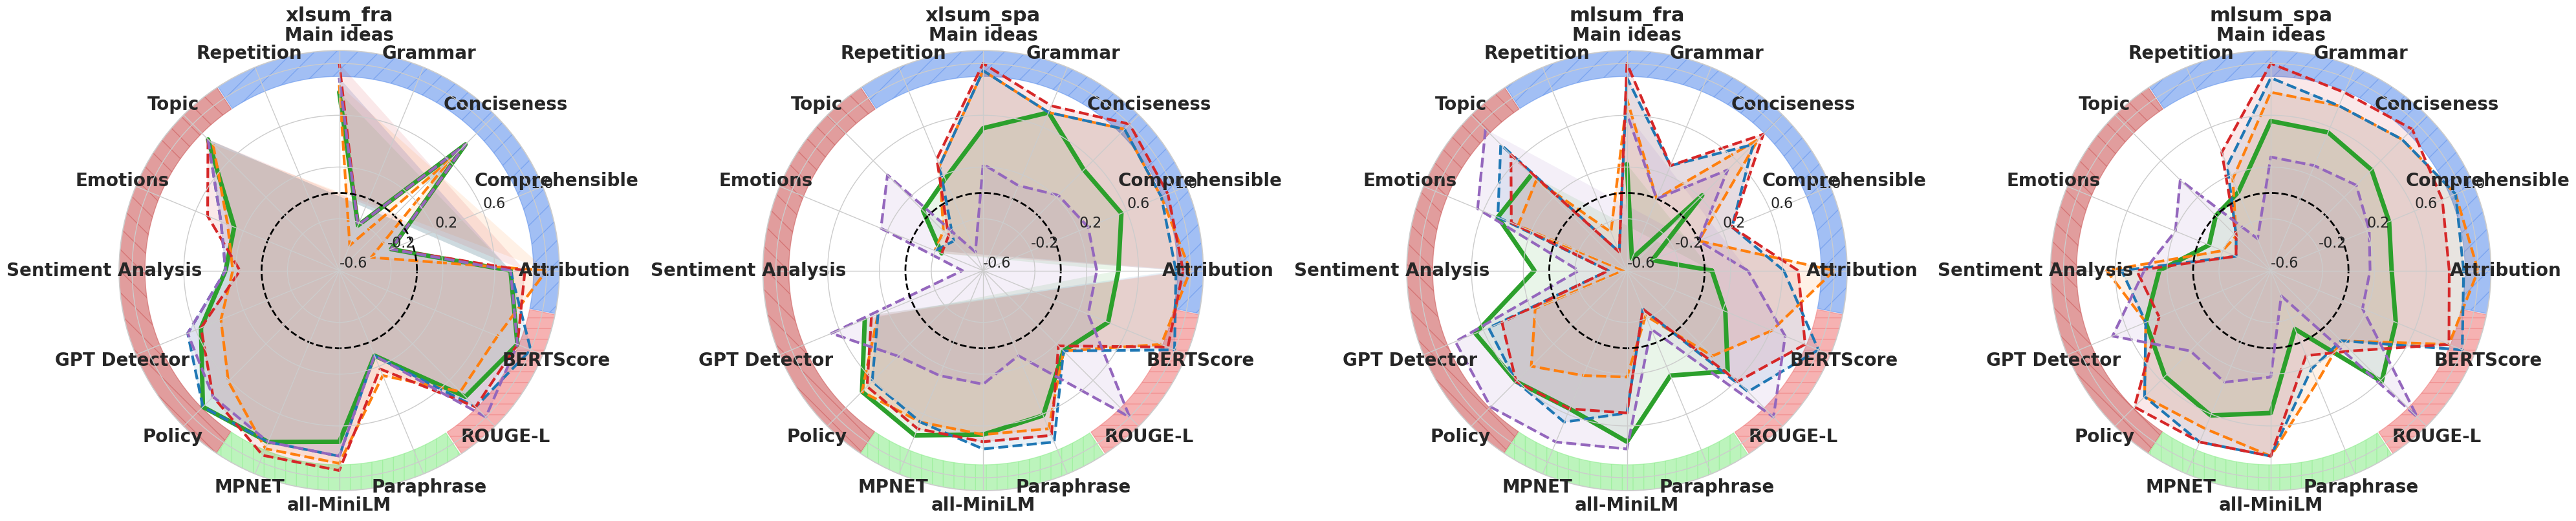

In [16]:

import math


# radar chart function

def make_radar_chart(df, indexes, columns, ax, ylim, yticks, legend):
    df = df.copy()

    # retrieve data
    data = df.loc[indexes, columns]
    
    # data = data.sort_index(axis=1)
    
    # make a plot for each row


    # to 0 if negative
    # values = np.array([0.01 if v < 0 else v for v in values])
    # get columns
    b_angles = [n / float(len(columns)) * 2 * math.pi for n in range(len(columns))]
    
    angles = b_angles + b_angles[:1]
    b_angles = b_angles + b_angles[:1]

    # dic with angle for each column
    angles_dict = {c: a for c, a in zip(columns, b_angles)}


    color_list = ['tab:green', 'tab:orange', 'tab:blue', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
              'tab:gray', 'tab:olive', 'tab:cyan']
    
    category_color_list = ['cornflowerblue', 'indianred', 'lightgreen', 'lightcoral', 'lightpink', 'lightgrey', 'lightyellow', 'lightcyan', 'lightseagreen']
    category_hat_list = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.']
    
    last_angle = 0
    for k, level_0 in enumerate(data.columns.get_level_values(0).unique()):
        print(level_0)
        print(data[level_0].columns)
        
        start_angle =  angles_dict[(level_0, data[level_0].columns[0])] 
        end_angle = angles_dict[(level_0, data[level_0].columns[-1])]

        if start_angle > end_angle:
            start_angle, end_angle = end_angle, start_angle

        start_angle = start_angle - 1/(float(len(columns))) * math.pi
        
        # if k == len(data.columns.get_level_values(0).unique()) - 1:
        #     end_angle = 2 * math.pi - 1/(float(len(columns))) * math.pi
        # else:
        end_angle = end_angle + 1/(float(len(columns))) * math.pi
            
        langles = np.arange(start_angle, end_angle, 0.01)

        ax.fill_between(langles,  0.9*np.ones(len(langles)), 1.2*np.ones(len(langles)), alpha=0.6, color=category_color_list[k], label=level_0, hatch=category_hat_list[k])

    
    for k, (idx, row) in enumerate(data.iterrows()):
        # get values
        values = row.values
        values = np.concatenate((values, [values[0]]))
        
        # plot
        if "ROUGE" in idx:
            idx = "ROUGE-L"
        elif "BERT" in idx:
            idx = "BERTScore"
        

        # fill
        if "I(S;T)" in idx:
            ax.plot(angles, values, linewidth=5, linestyle='solid', label=idx, color=color_list[k])
            ax.fill(angles, values, alpha=0.1, color=color_list[k])
        else:
            ax.plot(angles, values, linewidth=3, linestyle='--', label=idx, color=color_list[k])
            ax.fill(angles, values, alpha=0.1, color=color_list[k])

        # add legend

        # add grid
    ax.grid(True, which='both', axis='both', linestyle='solid')
    

    # set xticks
    ax.set_xticks(angles[:-1])

    # set xtick labels
    cc = []
    for c in columns:
        cc.append(task_map[c[1]])
        

            


    ax.set_xticklabels(cc, fontsize=20, fontweight='bold')
    

    # set yticks
    ax.set_yticks(yticks)

    # set ytick labels
    ax.set_yticklabels(yticks, fontsize=16)

    # set ylim
    ax.set_ylim(ylim)
        
        
# draw a circle at y=0
    ax.plot(np.linspace(0, 2 * math.pi, 100), np.zeros(100), linestyle='--', color='black', linewidth=2, label="Correlation = 0")
    
    ax.set_axisbelow(False)

table = make_correlation_table(df_comprehensive).transpose()

datasets = ['xlsum_fra', 'xlsum_spa', 'mlsum_fra', 'mlsum_spa']
dddf = table[datasets[0]].transpose()


columns = [c for c in dddf.columns]
print(columns)

fig, ax = plt.subplots(1, len(datasets), figsize=(40, 20), subplot_kw=dict(projection='polar'))




for k, d in enumerate(datasets):
    dddf = table[d].transpose()
    make_radar_chart(df=dddf, indexes=dddf.index, columns=columns, ax=ax[k], ylim=(-0.6, 1.1), yticks=[-0.6, -0.2, 0.2, 0.6, 1.0], legend=False)
    
    ax[k].set_title(d, fontsize=22, fontweight='bold')
    
# make global legend
# fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.2), ncol=3, fontsize=20)

fig.tight_layout()
fig.savefig(f"../../../papers/Mutual-information-for-summarization/img/{SUBSET_NAME}_radar_chart_all.png", dpi=300, bbox_inches='tight')



# columns = [c for c in dddf.columns if "SH." in c]
# 
# fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection='polar'))
# make_radar_chart(df=dddf, indexes=dddf.index, columns=columns, ax=ax, ylim=(-1, 1), yticks=[-1, -0.6, -0.2, 0.2, 0.6, 1.0])
# 
# 
# columns = [c for c in dddf.columns if "CT." in c]
# fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection='polar'))
# make_radar_chart(df=dddf, indexes=dddf.index, columns=columns, ax=ax, ylim=(0, 1), yticks=[0.2, 0.6, 0.8, 1.0]) 

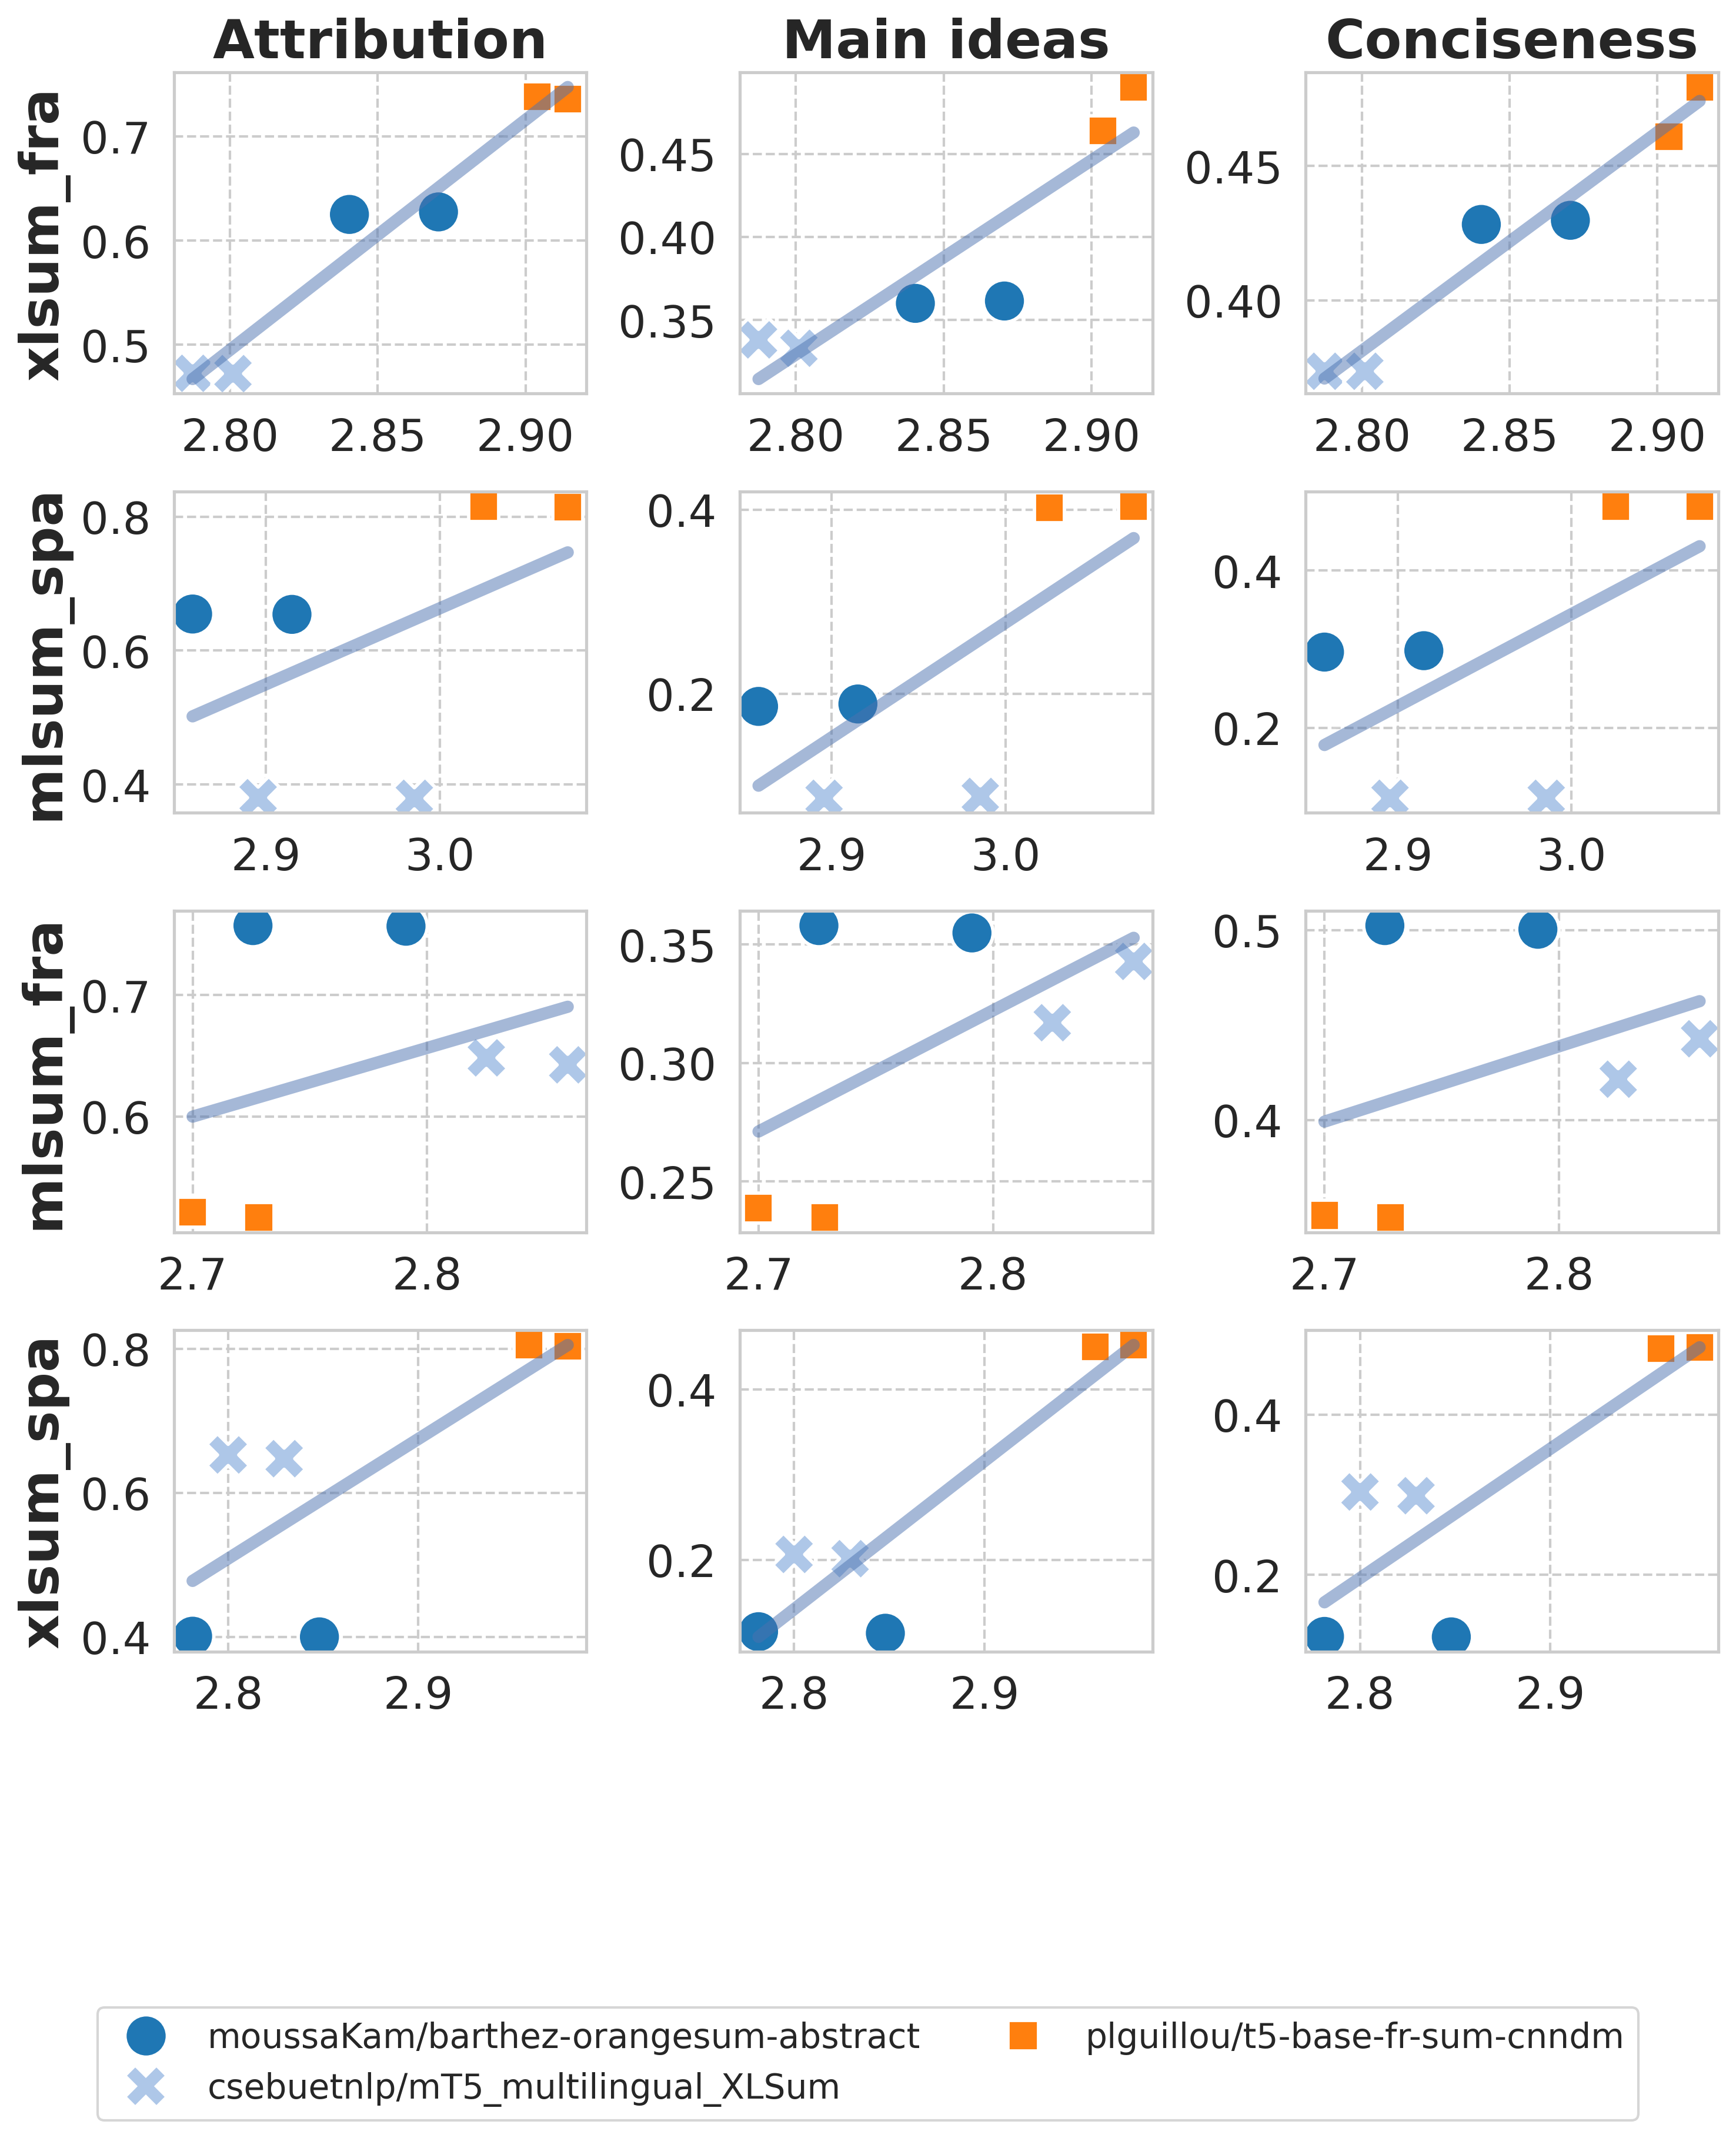

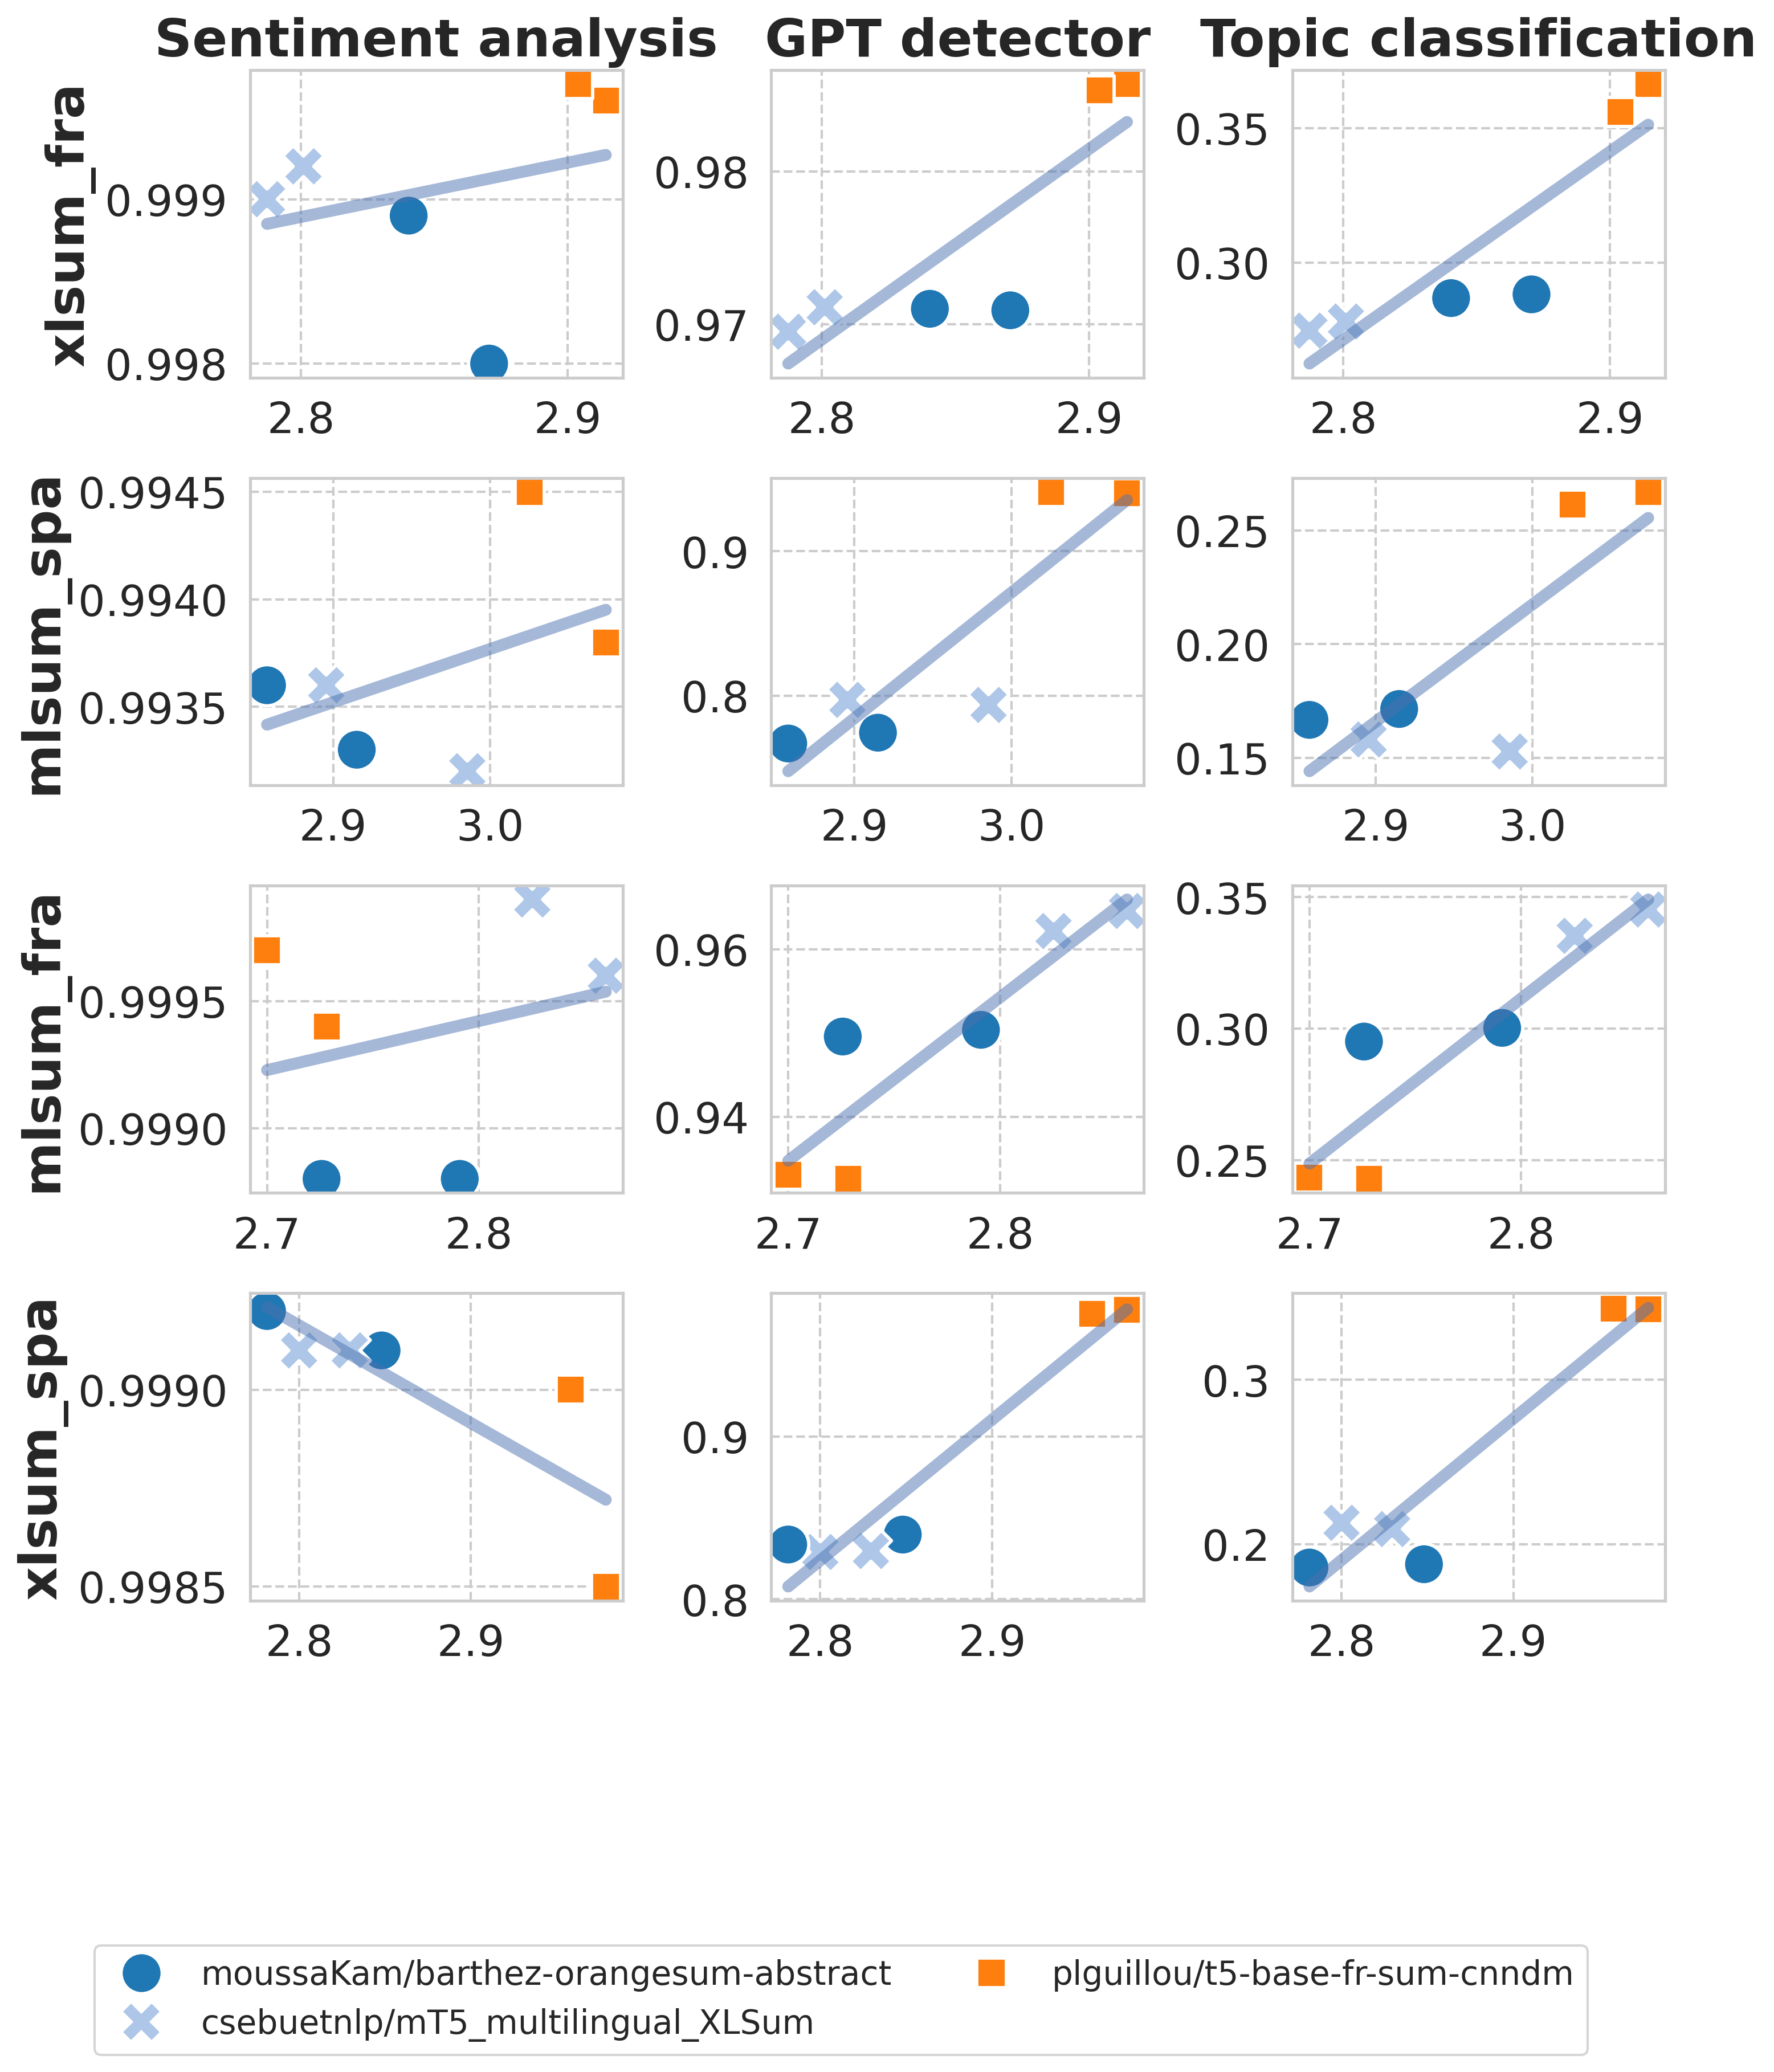

In [17]:

sns.set_theme(style="whitegrid")

ROUGES = ["common/rougeLsum"]
MI = ['I(summary -> text)', 'I(text -> summary)', 'max mi', 'min mi']
SHM = [c for c in df_comprehensive.columns if "SHMetric" in c and "proba_1" in c]
# keep only Attribution, Main idea, Conciseness
SHM = [c for c in SHM if "Attribution" in c or "Main ideas" in c or "Conciseness" in c]

map_tasks = {"mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis": "Sentiment analysis",
             "roberta-base-openai-detector": "GPT detector",
             "manifesto-project_manifestoberta-xlm-roberta-56policy-topics-context-2023-1-1" : "Topic classification",
             }

classification_tasks_error = [c + "/proba_of_error" for c in map_tasks.keys()]
classification_tasks = [c + "/proba_of_success" for c in map_tasks.keys()]

# make proba_of_error proba_of_success
df_comprehensive[classification_tasks] = 1 - df_comprehensive[classification_tasks_error]


def plot_multiple_datasets_correlations(df, COLS, metric, name):
    sns.set_theme(style="whitegrid")
    df = df.copy()

    df = df[~df['metadata/Decoding config'].str.contains("short")]

    df = df[~df['metadata/Decoding config'].isin([f"beam_sampling_{k}" for k in [5, 10, 20, 50]])]

    datasets = set(df['metadata/Dataset name'].dropna().unique())
    datasets -= set(['peer_read', 'arxiv', 'rotten_tomatoes'])

    fig, axes = plt.subplots(len(datasets), len(COLS), figsize=(10, 10), sharey=False, sharex=False, dpi=300)

    def rename_cols(x):
        if "SHMetric" in x:
            return x.split('/')[1]
        else:
            return map_tasks[x.split('/')[0]]

    for idx, col in enumerate(COLS):
        for didx, ds in enumerate(datasets):
            group = df[df['metadata/Dataset name'] == ds]
            sns.set_theme(style="whitegrid")

            sns.regplot(data=group, x=metric, y=col, ax=axes[didx, idx], x_ci=None, ci=False, scatter=False,
                        line_kws={'alpha': 0.5, 'linewidth': 5})
            sns.scatterplot(data=group, x=metric, y=col, hue='metadata/Model name', style='metadata/Model name',
                            ax=axes[didx, idx], palette='tab20', s=300)

            axes[didx, idx].set_xlabel("")
            if didx == 0:
                axes[didx, idx].set_title(rename_cols(col), fontsize=22, fontweight='bold')

            axes[didx, idx].set_ylabel("")
            if idx == 0:
                axes[didx, idx].set_ylabel(ds, fontsize=22, fontweight='bold')

            # make xtick labels bigger
            axes[didx, idx].tick_params(axis='x', labelsize=18)
            axes[didx, idx].tick_params(axis='y', labelsize=18)

            # add grid
            axes[didx, idx].grid(True, which='both', axis='both', linestyle='--')

    # global legend below the figure
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.22), ncol=2, fontsize=14)
    # remove all legends
    for ax in axes.flatten():
        ax.get_legend().remove()

    path = f"../../../papers/Mutual-information-for-summarization/img/multiple_datasets_correlations_{name}.png"
    # create parent

    fig.tight_layout()
    Path(path).parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(path, dpi=300, bbox_inches='tight')


plot_multiple_datasets_correlations(df_comprehensive, COLS=SHM, metric="I(summary -> text)", name="shmetrics_full_mi")
plot_multiple_datasets_correlations(df_comprehensive, COLS=classification_tasks, metric="I(summary -> text)",
                                   name="classification_tasks_full_mi")





# plot_multiple_datasets_correlations(df_comprehensive, COLS=SHM, metric="common/rougeLsum", name="shmetrics_full_rouge")
# plot_multiple_datasets_correlations(df_comprehensive, COLS=classification_tasks,metric="common/rougeLsum", name="classification_tasks_full_rouge")



/tmp/ipykernel_135386/3308302194.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=x, y=y, hue=hue, alpha=1, s=500, ax=ax, **kwargs, palette="tab10")
/tmp/ipykernel_135386/3308302194.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=x, y=y, hue=hue, alpha=1, s=500, ax=ax, **kwargs, palette="tab10")
/tmp/ipykernel_135386/3308302194.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=x, y=y, hue=hue, alpha=1, s=500, ax=ax, **kwargs, palette="tab10")
/tmp/ipykernel_135386/3308302194.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=x, y=y, hue=hue, alpha=1, s=500, ax=ax, **kwargs, palette="tab10")
/tmp/ipykernel_135386/3308302194.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=

AttributeError: 'NoneType' object has no attribute 'remove'

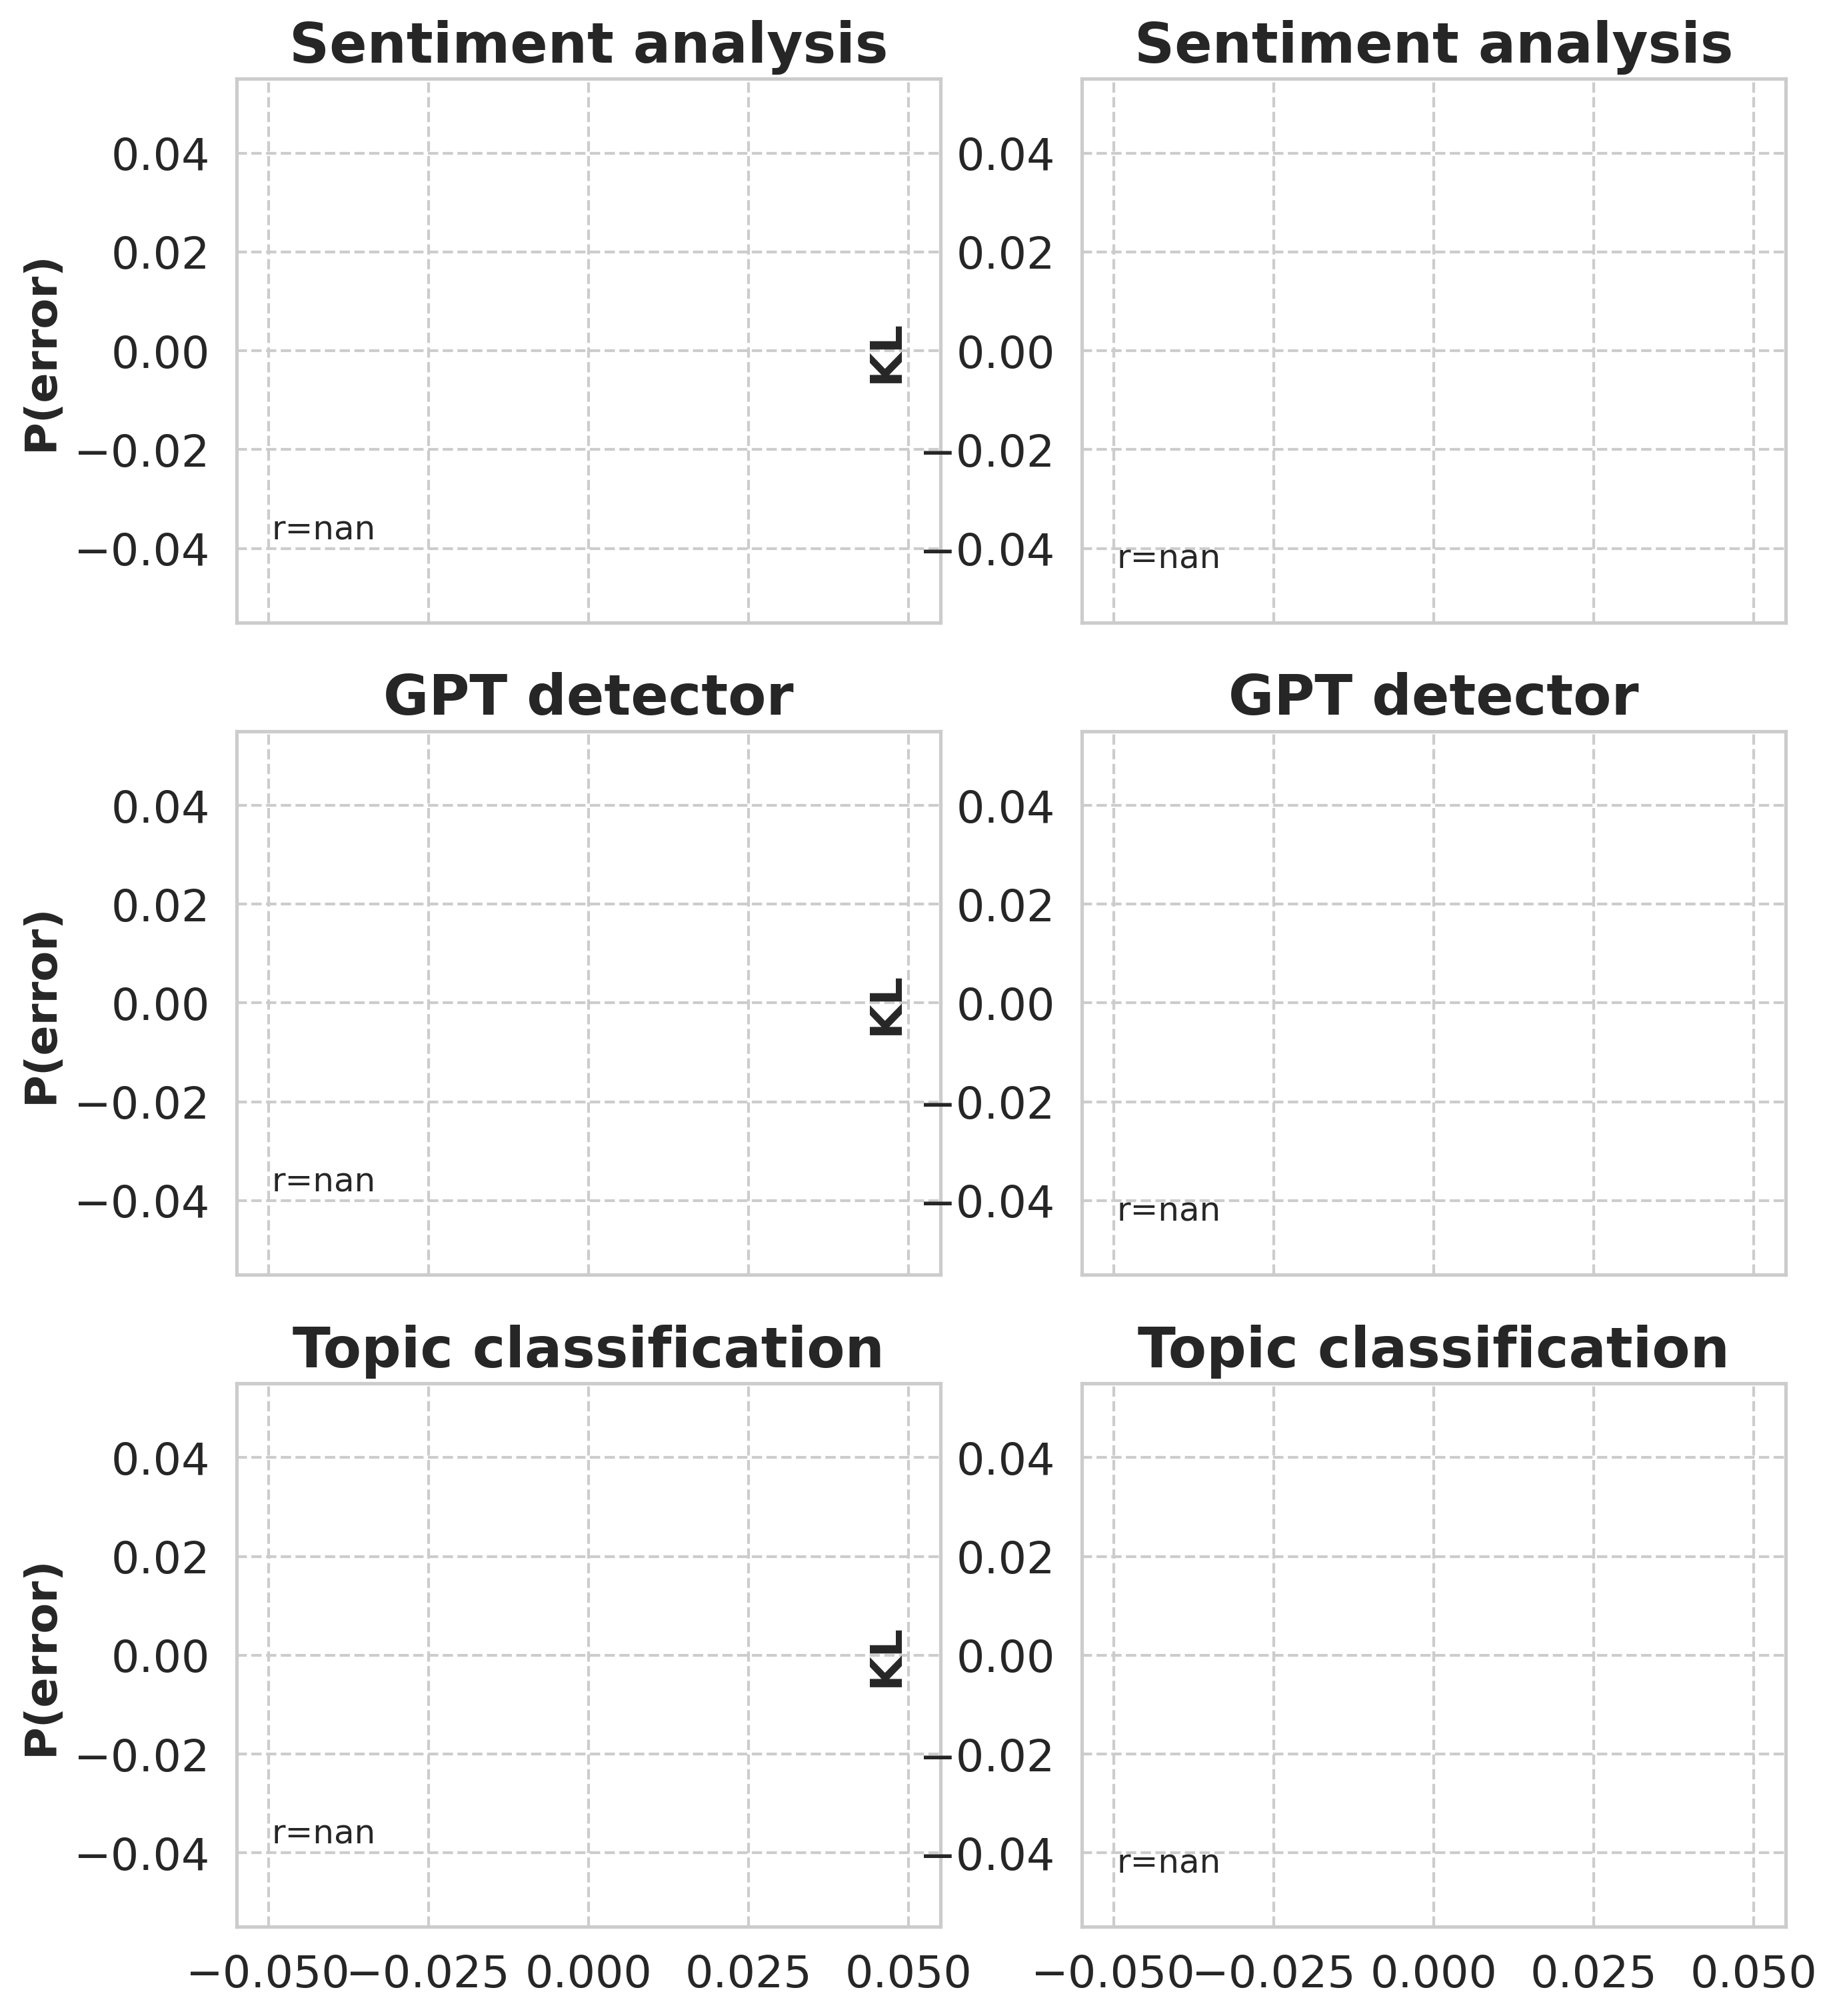

In [18]:

def plot_classification_tasks_proba_kl(df, dataset, legend=False, metric="I(summary -> text)"):
    df = df[~df['metadata/Decoding config'].str.contains("short")].copy()
    df = df[df['metadata/Dataset name'] == dataset]

    df = df[~df['metadata/Decoding config'].isin([f"beam_sampling_{k}" for k in [5, 10, 20, 50]])]

    map_tasks = {"mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis": "Sentiment analysis",
                 "roberta-base-openai-detector": "GPT detector",
                 "manifesto-project_manifestoberta-xlm-roberta-56policy-topics-context-2023-1-1" : "Topic classification",
                 }

    # select only the tasks we want

    # create a discrete sequential color palette with viridis

    def custom_reg_plot(data, x=None, y=None, hue=None, ax=None, **kwargs):
        sns.regplot(data=data, x=x, y=y, ci=None, scatter=False, ax=ax, x_ci='sd', line_kws={'linewidth': 5, 'alpha' : 0.5})
        sns.scatterplot(data=data, x=x, y=y, hue=hue, alpha=1, s=500, ax=ax, **kwargs, palette="tab10")
        return ax

    fig, axes = plt.subplots(len(map_tasks), 2, figsize=(10, 12), sharey=False, sharex=True, dpi=300)

    for tidx, task in enumerate(map_tasks.keys()):
        topplot = df
        # rename columns
        topplot = topplot.rename(
            columns={"metadata/Decoding size": "Decoding size", "metadata/Model name": "Model name",
                     "metadata/Decoding config": "Decoding config"})

        custom_reg_plot(data=topplot, x=metric, y=f"{task}/proba_of_error", hue="Model name",
                        style='Model name', ax=axes[tidx, 0])
        custom_reg_plot(data=topplot, x=metric, y=f"{task}/kl", hue="Model name", style='Model name',
                        ax=axes[tidx, 1])

        # annotate with r value
        axes[tidx, 0].annotate(f"r={topplot[metric].corr(df[f'{task}/proba_of_error']):.2f}",
                               xy=(0.05, 0.2), xycoords='axes fraction', fontsize=12,
                               horizontalalignment='left', verticalalignment='top')
        axes[tidx, 1].annotate(f"r={topplot[metric].corr(df[f'{task}/kl']):.2f}", xy=(0.05, 0.1),
                               xycoords='axes fraction', fontsize=12, )

        # add title
        axes[tidx, 0].set_title(map_tasks[task], fontsize=20, fontweight='bold')
        axes[tidx, 1].set_title(map_tasks[task], fontsize=20, fontweight='bold')

        # add y label
        axes[tidx, 0].set_ylabel("P(error)", fontsize=16, fontweight='bold')
        axes[tidx, 1].set_ylabel("KL", fontsize=16, fontweight='bold')

        # remove x label:
        axes[tidx, 0].set_xlabel("")
        axes[tidx, 1].set_xlabel("")
        
        # make tick labels bigger
        axes[tidx, 0].tick_params(axis='x', labelsize=16)
        axes[tidx, 1].tick_params(axis='x', labelsize=16)
        
        axes[tidx, 0].tick_params(axis='y', labelsize=16)
        axes[tidx, 1].tick_params(axis='y', labelsize=16)
         
        axes[tidx, 0].grid(True, which='both', axis='both', linestyle='--')
        axes[tidx, 1].grid(True, which='both', axis='both', linestyle='--')

    # add global legend
    handles, labels = axes[0, 0].get_legend_handles_labels()
    # fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=2, fontsize=16)
    # remove all legends
    for ax in axes.flatten():
        ax.get_legend().remove()
        
    if legend:
        fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.20), ncol=2, fontsize=16)

    fig.tight_layout()

    # save figure
    path = f"../../../papers/Mutual-information-for-summarization/img/classification_tasks/{dataset}_{metric}_classification_tasks_full.png"
    # create parent
    Path(path).parent.mkdir(parents=True, exist_ok=True)

    fig.savefig(path, dpi=300, bbox_inches='tight')


plot_classification_tasks_proba_kl(df_comprehensive, dataset="cnn_dailymail")
plot_classification_tasks_proba_kl(df_comprehensive, dataset="rotten_tomatoes")

plot_classification_tasks_proba_kl(df_comprehensive, dataset="xsum")
plot_classification_tasks_proba_kl(df_comprehensive, dataset="multi_news")


In [ ]:

def plot_classification_tasks_proba(df, legend=False):
    df = df[~df['metadata/Decoding config'].str.contains("short")].copy()
    df = df[~df['metadata/Dataset name'].str.contains('rotten')]


    map_tasks = {"mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis": "Sentiment analysis",
                 "roberta-base-openai-detector": "GPT detector",
                 "manifesto-project_manifestoberta-xlm-roberta-56policy-topics-context-2023-1-1" : "Topic classification",
                 }
    
    tasks = [c + "/proba_of_error" for c in map_tasks.keys()]
    
    ddf =pd.melt(df, id_vars=['metadata/Model name', 'metadata/Dataset name', 'metadata/#params', 'I(summary -> text)'], value_vars=tasks, var_name='Task', value_name='P(error)')
    ddf = ddf.rename(columns={'metadata/Model name': 'Model', 'metadata/Dataset name': 'Dataset', 'metadata/#params': '#params'})
    ddf['Task'] = ddf['Task'].map(lambda x: x.split('/')[0])
    ddf['Task'] = ddf['Task'].map(lambda x: map_tasks[x])
    
    # legend below
    g = sns.relplot(data=ddf, x="I(summary -> text)", y="P(error)", hue="Model", style='Model', col="Task", row="Dataset", height=3, aspect=0.7, palette='tab10', facet_kws={'sharey': False, 'sharex': False, 'margin_titles':True}, s=500)
    
    # add regression line
    g.map(sns.regplot, "I(summary -> text)", "P(error)", scatter=False, ci=0.95, line_kws={'linewidth': 10, 'alpha': 0.5})
    
    # make title bigger
    #g.fig.suptitle("Probability of error vs $I(T,S)$", fontsize=20, fontweight='bold')
    
    # Column title format 
    g.set_titles(row_template="{row_name}", col_template="{col_name}", size=20, fontweight='bold')
    
    # make ylabels bigger
    g.set_ylabels("P(error)", fontsize=20, fontweight='bold')
    
    # make xlabels bigger
    g.set_xlabels("$I(T,S)$", fontsize=20, fontweight='bold')
    
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.6, -0.3), ncol=2, fontsize=16)
    

    # save figure
    path = f"../../../papers/Mutual-information-for-summarization/img/classification_tasks/classification_tasks_full_proba.png"
    # create parent
    Path(path).parent.mkdir(parents=True, exist_ok=True)
    
    g.fig.tight_layout()

    g.fig.savefig(path, dpi=300, bbox_inches='tight')


plot_classification_tasks_proba(df_comprehensive)



In [ ]:



def plot_reg(x,y, **kwargs):
    ax = plt.gca()
    sns.regplot(x=x,y=y, ci=95, color=kwargs.get('color') , scatter=False, ax=ax, x_ci='sd', line_kws={'linewidth': 2, 'alpha' : 0.5}, truncate=True, label=kwargs.get('label'), robust=True)
    return ax

def plot_classification_tasks_proba_scatter(df, legend=False, metric="I(summary -> text)"):
    df = df[~df['metadata/Decoding config'].str.contains("short")].copy()
    df = df[df['metadata/Decoding config'].str.contains("200")].copy()
    
    df = df[~df['metadata/Dataset name'].str.contains('rotten')]


    map_tasks = {"mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis": "Sentiment analysis",
                 "roberta-base-openai-detector": "GPT detector",
                 "manifesto-project_manifestoberta-xlm-roberta-56policy-topics-context-2023-1-1" : "Topic classification",
                 }

    tasks = [c + "/proba_of_error" for c in map_tasks.keys()]

    ddf =pd.melt(df, id_vars=['metadata/Model name', 'metadata/Dataset name', 'metadata/#params', metric], value_vars=tasks, var_name='Task', value_name='P(error)')
    ddf = ddf.rename(columns={'metadata/Model name': 'Model', 'metadata/Dataset name': 'Dataset', 'metadata/#params': '#params'})
    ddf['Task'] = ddf['Task'].map(lambda x: x.split('/')[0])
    ddf['Task'] = ddf['Task'].map(lambda x: map_tasks[x])

    # legend below
    # g = sns.relplot(data=ddf, x="I(summary -> text)", y="P(error)", style="Model", hue='Dataset', col="Task", height=5, aspect=0.7, palette='tab10', facet_kws={'sharey': False, 'sharex': False, #'margin_titles':True}, s=200, hue_order=['xsum', 'cnn_dailymail', 'multi_news'])
    
    # make facetgrid 
    g = sns.FacetGrid(data=ddf, col="Task", hue='Dataset', height=7, aspect=1.2, palette='tab10', col_order=['Sentiment analysis', 'GPT detector', 'Topic classification'], sharex=False, sharey=False)
    
    # add scatter plot
    g.map_dataframe(sns.scatterplot, metric, "P(error)", s=300, alpha=1, style='Model', hue_order=['xsum', 'cnn_dailymail', 'multi_news'])
    
    # add regression line
    g.map(plot_reg, metric, "P(error)")

    # make title bigger
    #g.fig.suptitle("Probability of error vs $I(T,S)$", fontsize=20, fontweight='bold')

    # Column title format 
    g.set_titles(row_template="{row_name}", col_template="{col_name}", size=20, fontweight='bold')

    # make ylabels bigger
    g.set_ylabels("P(error)", fontsize=20, fontweight='bold')

    # make xlabels bigger
    g.set_xlabels("$I(T,S)$", fontsize=20, fontweight='bold')
    
    # make xticks bigger
    g.set_xticklabels(fontsize=16)
    
    # make yticks bigger
    g.set_yticklabels(fontsize=16)
    
    handles, labels = g.axes[0, 0].get_legend_handles_labels()
    
    by_label = dict(zip(labels, handles))
    # order by length of label
    by_label = {k: v for k, v in sorted(by_label.items(), key=lambda item: len(item[0]))}
    
    # add legend
    g.fig.legend(by_label.values(), by_label.keys(), loc='lower center', bbox_to_anchor=(0.5, -0.22), ncol=5, fontsize=20)

    # save figure
    path = f"../../../papers/Mutual-information-for-summarization/img/classification_tasks/classification_tasks_full_proba_scatter_{metric}.png"
    # create parent
    Path(path).parent.mkdir(parents=True, exist_ok=True)

    g.fig.tight_layout()

    g.fig.savefig(path, dpi=300, bbox_inches='tight')


plot_classification_tasks_proba_scatter(df_no_arxiv)
plot_classification_tasks_proba_scatter(df_no_arxiv, metric="common/BERTScore")





In [ ]:
def plot_model_comparison(df):
    df = df.copy()
    # remove dataset rotten tomatoes
    df = df[df['metadata/Dataset name'] != 'rotten_tomatoes']
    
    # remove first part of model name
    df['metadata/Model name'] = df['metadata/Model name'].apply(lambda x: " ".join(x.split('/')[1:]))
    
    # sort by model size
    df = df.sort_values(by=['metadata/IND/OOD', 'metadata/#params'])
    ax = sns.barplot(data=df, x='metadata/Model name', y='I(summary -> text)', hue='metadata/Dataset name', orient='v', palette='tab10')
    
    # twin axes x with model size
    ax2 = plt.twinx()
    # log scale
    ax2.set_yscale('log')
    
    sns.barplot(data=df, x='metadata/Model name', y='metadata/#params', orient='v',  ax=ax2, alpha=0.6, color='grey')
    
    # make ylim 40, 60
    ax.set_ylim(40, 60)
    
    # rotate x labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
    
    # rename labels
    ax.set_xlabel("")
    ax.set_ylabel("$I(T;S)$", fontsize=20, )
    ax2.set_ylabel("Size", fontsize=20)
    


    
    # add vertical lines for the best model on each dataset
    for didx, dataset in enumerate(reversed(['xsum', 'cnn_dailymail', 'multi_news'])):
        best_model = df[df['metadata/Dataset name'] == dataset].sort_values(by='I(summary -> text)').iloc[-1]
        ax.axhline(y=best_model['I(summary -> text)'], color=f'C{didx}', linestyle='--', alpha=1, linewidth=3)
        
        
    # put legend outside top 
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fontsize=16)

    

    # save figure
    path = f"../../../papers/Mutual-information-for-summarization/img/model_comparison.png"
    # create parent
    Path(path).parent.mkdir(parents=True, exist_ok=True)
    
    fig = ax.get_figure()
    # fig.tight_layout()
    fig.savefig(path, dpi=300, bbox_inches='tight')
    
    


plot_model_comparison(df_comprehensive)

In [ ]:
def plot_correlation_matrix(df):
    df = df.copy()
    # remove dataset rotten tomatoes
    df = df[df['metadata/Dataset name'] != 'rotten_tomatoes']
    
    # remove first part of model name
    df['metadata/Model name'] = df['metadata/Model name'].apply(lambda x: " ".join(x.split('/')[1:]))
    
    # sort by model size
    df = df.sort_values(by=['metadata/IND/OOD', 'metadata/#params'])
    
    # select only the columns we want
    ROUGES = ["common/rougeLsum"]
    MI = ['I(summary -> text)']
    SHM = [c for c in df.columns if "SHMetric" in c and "proba_1" in c]
    # keep only Attribution, Main idea, Conciseness
    SHM = [c for c in SHM if "Attribution" in c or "Main ideas" in c or "Conciseness" in c]
    
    map_tasks = {"mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis": "Sentiment analysis",
                 "roberta-base-openai-detector": "GPT detector",
                 "manifesto-project_manifestoberta-xlm-roberta-56policy-topics-context-2023-1-1" : "Topic classification",
                 }
    
    classification_tasks_error = [c + "/proba_of_error" for c in map_tasks.keys()]
    classification_tasks = [c + "/proba_of_success" for c in map_tasks.keys()]
    
    # make proba_of_error proba_of_success
    df[classification_tasks] = 1 - df[classification_tasks_error]

    def rename_metrics(x):
        splits = x.split('/')

        if len(splits) == 1:
            if splits[0] == "I(summary -> text)":
                return "$I(T,S)$"
            else:
                return x
        else:
            if splits[0] in map_tasks.keys():
                return map_tasks[splits[0]]
            else:
                if splits[1] == "rougeLsum":
                    return "ROUGE-L"
                else:
                    return splits[1]

    # select only the tasks we want
    df = df[ROUGES + MI + SHM + classification_tasks]
    
    
    # rename columns
    df.columns = [rename_metrics(c) for c in df.columns]
    
    
    corrs = df.corr(method='spearman')
    
    sns.set_theme(style="white")
    fig, ax = plt.subplots(figsize=(10, 10))
    
    mask = np.triu(np.ones_like(corrs, dtype=bool), k=1)
    sns.heatmap(corrs, annot=True, cmap='Blues', robust=True, annot_kws={"fontsize": 16}, ax=ax, mask=mask, fmt='.1f', square=True)
    
    # resize yticks
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
    
    # save figure
    path = f"../../../papers/Mutual-information-for-summarization/img/correlation_matrix.png"
    # create parent
    Path(path).parent.mkdir(parents=True, exist_ok=True)
    
    fig.tight_layout()
    fig.savefig(path, dpi=300, bbox_inches='tight')
    
    
    

    
plot_correlation_matrix(df_comprehensive)